

 # Pandas Basics <hr style="border:3x solid #FE1919"></hr>

Data Analyst: Dominic L. Quirido

Department: Electrical Engineering

# DataFrame

In [ ]:
%pip install scipy
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

ModuleNotFoundError: No module named 'pandas'

In [ ]:
data = {
    "Name" : ['Henry','Owen','Ada'],
    "Age"  : [22, 35, 58],
    "Sex" : ['M','M' ,'F']
}
data

{'Name': ['Henry', 'Owen', 'Ada'], 'Age': [22, 35, 58], 'Sex': ['M', 'M', 'F']}

In [ ]:
df = pd.DataFrame(data)
df

,Name,Age,Sex
0,Henry,22,M
1,Owen,35,M
2,Ada,58,F


In [ ]:
df['Age'].sum()

115

In [ ]:
df['Age'].mean()

38.333333333333336

In [ ]:
df['Age'].var()

332.3333333333333

# DataFrameElectricity

In [ ]:
type(x)

pandas.core.series.Series

In [ ]:
electricity={
    "Current" : [1.8, 2, 2.7, 3.5, 4.2],
    "Power" : [90, 100, 110, 200, 210]
}
electricity

{'Current': [1.8, 2, 2.7, 3.5, 4.2], 'Power': [90, 100, 110, 200, 210]}

In [ ]:
df = pd.DataFrame(electricity)
df

,Current,Power
0,1.8,90
1,2.0,100
2,2.7,110
3,3.5,200
4,4.2,210


In [ ]:
df.sum()

Current     14.2
Power      710.0
dtype: float64

In [ ]:
df.mean()

Current      2.84
Power      142.00
dtype: float64

In [ ]:
df.var()

Current       1.023
Power      3370.000
dtype: float64

In [ ]:
df.cov()

,Current,Power
Current,1.023,56.15
Power,56.150,3370.00


In [ ]:
df.corr()

,Current,Power
Current,1.000000,0.956306
Power,0.956306,1.000000


In [ ]:
df.head()

,Current,Power
0,1.8,90
1,2.0,100
2,2.7,110
3,3.5,200
4,4.2,210


In [ ]:
df.tail()

,Current,Power
0,1.8,90
1,2.0,100
2,2.7,110
3,3.5,200
4,4.2,210


In [ ]:
df.describe()

,Current,Power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


# Scatter Plot

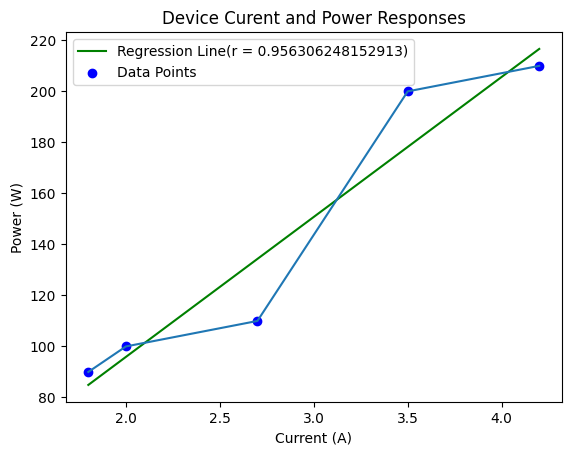

In [ ]:
x = df['Current']
y = df['Power']

# regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x + intercept

plt.plot(x,line, color = 'green', label=f'Regression Line(r = {r_value})')

#scatter
plt.scatter(x,y, color = 'blue', label='Data Points')
plt.plot(x,y)
plt.title('Device Curent and Power Responses')
plt.ylabel('Power (W)')
plt.xlabel('Current (A)')
plt.legend()
plt.show()


# Resistance Test

In [ ]:
resistance = pd.read_csv(r"resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [ ]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


In [ ]:
resistance['Jaguar'].mean()

9.399999999999999

In [ ]:
pan_mean = resistance['Panther'].mean()
pan_mean

10.75

In [ ]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

9.399999999999999

In [ ]:
resistance['Panther'] = resistance['Panther'].fillna(pan_mean)

In [ ]:
resistance.fillna(pan_mean)

,Test No.,Jaguar,Panther
0,1,10.6,10.10
1,2,9.1,11.00
2,3,9.3,9.10
3,4,9.8,20.00
4,5,10.5,9.20
5,6,10.4,10.80
6,7,9.5,9.90
7,8,11.0,9.20
8,9,10.4,9.10
9,10,3.0,9.10


In [ ]:
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.10
1,2,9.1,11.00
2,3,9.3,9.10
3,4,9.8,20.00
4,5,10.5,9.20
5,6,10.4,10.80
6,7,9.5,9.90
7,8,11.0,9.20
8,9,10.4,9.10
9,10,3.0,9.10


In [ ]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


# Bar Graph

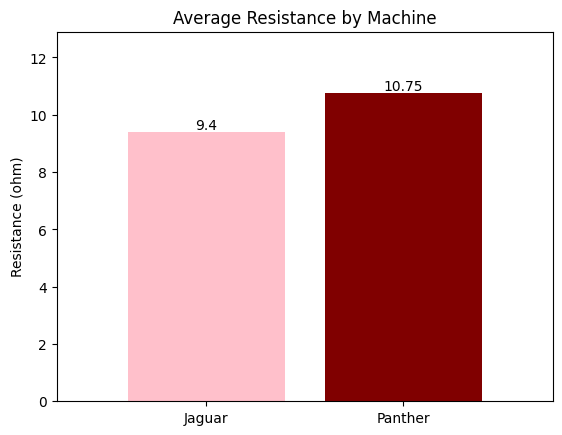

In [ ]:
bars = plt.bar(['Jaguar', 'Panther'], [jag_mean, pan_mean], color = ('pink' , 'maroon' ))
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (ohm)')

# bar labels
plt.bar_label(bars)
plt.margins(y=0.2) #20%
plt.margins(x=0.2) #20%


plt.show()